## Compressive sampling Overview

In our previous discussion, we saw that imposing bandlimited-ness on our class of signals permits point-wise sampling of our signal and then later perfect reconstruction. It turns out that by imposing *sparsity* we can also obtain perfect reconstruction irrespective of whether or not we have satsified the sampling rate limits imposed by Shannon's sampling theorem. This has extremely important in practice because many signals are naturally sparse so that collecting samples at high rates only to dump most of them as the signal is compressed is expensive and wasteful. 

## What Are Sparse Signals?

Let's carefully discuss what we mean by *sparse* in this context. A signal $f$ is sparse if it can be expressed in very few nonzero components ($\mathbf{s}$) with respect to a given basis ($ \mathbf{\Psi} $ ). In other words, in matrix-vector language:

$ \mathbf{f} = \mathbf{\Psi} \mathbf{s} $

where  $ || \mathbf{s} ||_0 \leq N $ where $N$ is the length of the vector and  $|| \cdot||_0$ counts the number of nonzero elements in $\mathbf{s}$. Furthermore, we don't actually collect $N$ samples point-wise as we did in the Shannon sampling case. Rather, we measure $\mathbf{f}$ indirectly as $\mathbf{y}$ with another matrix as in:

$\mathbf{y}  = \mathbf{\Phi f} = \mathbf{\Phi} \mathbf{\Psi} \mathbf{s} = \mathbf{\Theta s}   $

where  $\mathbf{\Theta}$  is an $M \times N$ matrix and $ M < N $ is the number of measurements. This setup means we have two problems to solve. First, how to design a *stable* measurement matrix $\mathbf{\Phi}$ and then, second, how to reconstruct $ \mathbf{f} $ from $ \mathbf{y} $. 

This may look like a standard linear algebra problem but since $ \mathbf{\Theta} $ has fewer rows than columns, the solution is necessarily ill-posed. This is where we inject the sparsity concept! Suppose that $f$ is $K$-sparse ( $||f||_0=K$ ), then if we somehow knew *which* $K$ columns of $ \mathbf{\Theta} $ matched the $K$ non-zero entries in $\mathbf{s}$, then $\mathbf{\Theta}$ would be $ M \times K $ where we could make $M > K$ and then have a stable inverse.

This bit of reasoning is encapsulated in the following statement for any vector $\mathbf{v}$ sharing the same $K$ non-zero entries as $\mathbf{s}$, we have 

$$1-\epsilon \leq \frac{||  \mathbf{\Theta v} ||_2}{|| \mathbf{v}  ||_2} \leq 1+\epsilon $$ 

which is another way of saying that $\mathbf{\Theta}$ preserves the lengths of $K$-sparse vectors. Of course we don't know ahead of time which $K$ components to use, but it turns out that this condition is sufficient for a stable inverse of $\mathbf{\Theta}$ if it holds for any  $3K$-sparse vector $\mathbf{v}$. This is the *Restricted Isometry Property* (RIP). Unfortunately, in order to use this sufficient condition, we would have to propose a $\mathbf{\Theta}$ and then check all possible combinations of nonzero entries in the $N$-length vector $\mathbf{v}$. As you may guess, this is prohibitive.

Alternatively, we can approach stability by defining *incoherence* between the measurement matrix $\mathbf{\Phi}$ and the sparse basis $\mathbf{\Psi}$ as when any of the columns of one cannot be expressed as a small subset of the columns of the other. For example, if we have delta-spikes for $\mathbf{\Phi}$ as the row-truncated identity matrix

$$\mathbf{\Phi} = \mathbf{I}_{M \times N} $$

and the discrete Fourier transform matrix for $\mathbf{\Psi}$ as

$\mathbf{\Psi} = \begin{bmatrix}\\\\
e^{-j 2\pi k n/N}\\\\
\end{bmatrix}_{N \times N}$

Then we could not write any of the columns of $\mathbf{\Phi}$ using just a few of the columns of $\mathbf{\Psi}$.

It turns out that picking the measuring $M \times N$ matrix randomly according to a Gaussian zero-mean, $1/N$ variance distribution and using the identity matrix as $\mathbf{\Phi}$, that the resulting $\mathbf{\Theta}$ matrix can be shown to satisfy RIP with a high probability. This means that we can recover $N$-length $K$-sparse signals with a high probability from just $M \ge c K \log (N/K)$ samples where $c$ is a small constant. Furthermore, it also turns out that we can use any orthonormal basis for $\mathbf{\Phi}$, not just the identity matrix, and these relations will all still hold.

## Reconstructing Sparse Signals

Now that we have a way, by using random matrices, to satisfy the RIP, we are ready to consider the reconstruction problem. The first impulse is to compute the least-squares solution to this problem as

$$ \mathbf{s}^* = \mathbf{\Theta}^T (\mathbf{\Theta}\mathbf{\Theta}^T)^{-1}\mathbf{y} $$ 

But a moment's thought may convince you that since $\mathbf{\Theta}$ is a random matrix, most likely with lots of non-zero entries, it is highly unlikely that $\mathbf{s}^* $ will turn out to be sparse. There is actually a deeper geometric intuition as to why this happens, but let's first consider another way of solving this so that the $\mathbf{s}^*$ is $K$-sparse.  Suppose instead we shuffle through combinations of $K$ nonzero entries in $\mathbf{s}$ until we satisfy the measurements $\mathbf{y}$. Stated mathematically, this means

$$ \mathbf{s}^* = argmin || \mathbf{s}^* ||_0  $$

where

$$ \mathbf{\Theta} \mathbf{s}^* = \mathbf{y} $$

It can be shown that with $M=K+1$ iid Gaussian measurements, this optimization will recover a $K$-sparse signal exactly with high probability. Unfortunately, this is numerically unstable in addition to being an NP-complete problem.

Thus, we need another tractable way to approach this problem. It turns out that when a signal is sparse, it usually means that the nonzero terms are highly asymmetric meaning that if there are $K$ terms, then most likely there is one term that is dominant (i.e. of much larger magnitude) and that dwarfs the other nonzero terms. Geometrically, this means that in $N$-dimensional space, the sparse signal is very close to one (or, maybe just a few)  of the axes. 

It turns out that one can bypass this combinatorial problem using $L_1$ minimization. To examine this, let's digress and look at the main difference between $L_2$ and $L_1$ minimization problems.

reference:
`http://users.ece.gatech.edu/justin/ssp2007`

## $L_2$ vs. $L_1$ Optimization

The classic constrained least squares problem is the following:

min $||\mathbf{x}||_2^2$

where $x_1 + 2 x_2 = 1$

with corresponding solution illustrated below.


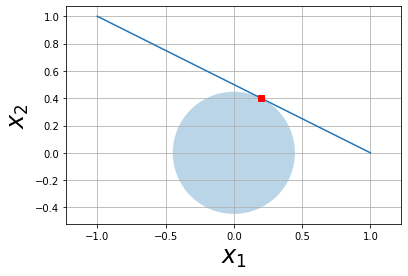

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
x1 = np.linspace(-1,1,10)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1,(1-x1)/2)
ax.add_patch(Circle((0,0),1/np.sqrt(5),alpha=0.3))
ax.plot(1/5,2/5,'rs')
ax.axis('equal')
ax.set_xlabel('$x_1$',fontsize=24)
ax.set_ylabel('$x_2$',fontsize=24)
ax.grid()

Note that the line is the constraint so that any solution to this problem must be on this line (i.e. satisfy the constraint). The $L_2$ solution is the one that just touches the perimeter of the circle. This is because, in $L_2$, the unit-ball has the shape of a circle and represents all solutions of a fixed $L_2$ length. Thus, the one of smallest length that intersects the line is the one that satisfies the stated minimization problem. Intuitively, this means that we *inflate* a ball at the origin and stop when it touches the contraint. The point of contact is our $L_2$ minimization solution.

Now, let's do same problem in $L_1$ norm

min $||\mathbf{x}||_1=|x_1|+|x_2|$

where $x_1 + 2 x_2 = 1$

In this case the constant-norm unit-ball contour in the $L_1$ norm is a diamond-shape instead of a circle. Comparing the  graph below to the last shows that the solutions found are different. Geometrically, this is because the line tilts over in such a way that the inflating circular $L_2$ ball hits a point of tangency that is different from the $L_1$ ball because the $L_1$ ball creeps out mainly along the principal axes and is less influenced by the tilt of the line. This effect is much more pronounced in higher $N$-dimensional spaces where $L_1$-balls get more *spikey*. 

The fact that the $L_1$ problem is less sensitive to the tilt of the line is crucial since that tilt (i.e. orientation) is random due the choice of random measurement matrices. So, for this problem to be well-posed, we need to *not* be influenced by the orientation of any particular choice of random matrix and this is what casting this as a $L_1$ minimization provides. 

(-1.1, 1.1, -0.575, 1.075)

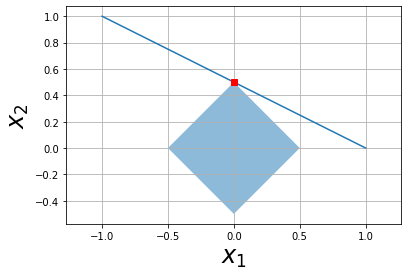

In [6]:
from matplotlib.patches import Rectangle
import matplotlib.patches
import matplotlib.transforms

r = matplotlib.patches.RegularPolygon((0,0),4,1/2, np.pi/2,alpha=0.5)

fig = plt. figure()
ax = fig.add_subplot(111)
ax.plot(x1,(1-x1)/2)
ax.plot(0,1/2,'rs')
ax.add_patch(r)
ax.grid()
ax.set_xlabel('$x_1$',fontsize=24)
ax.set_ylabel('$x_2$',fontsize=24)
ax.axis('equal')


To explore this a bit, let's consider using the `cvxopt` package. This can be cast as a linear programming problem as follows:

min $||\mathbf{t}||_1 = |t_1| + |t_2|$

subject to:

$-t_1 < x_1 < t_1$

$-t_2 < x_2 < t_2$

$x_1 + 2 x_2 = 1$

$t_1 > 0$

$t_2 > 0$

where the last two constraints are already implied by the first two and are written out just for clarity. This can be implemented and solved in `cvxopt` as the following:

In [50]:
from cvxopt import matrix as matrx # don't overrite numpy matrix class
from cvxopt import solvers

#t1,x1,t2,x2
c = matrx([1,0,1,0],(4,1),'d') 
G = matrx([   [-1,  -1, 0,  0],  #column-0
              [ 1,  -1, 0,  0],  #column-1
              [ 0,   0, -1,-1],  #column-2
              [ 0,   0,  1,-1],  #column-3
           ],(4,4),'d')

h = matrx([0,0,0,0],(4,1),'d') # (4,1) is 4-rows,1-column, 'd' is float type spec
A = matrx([0,1,0,2],(1,4),'d')
b = matrx([1],(1,1),'d')
sol = solvers.lp(c, G, h,A,b)
x1=sol['x'][1]
x2=sol['x'][3]
print('x1=%3.2f'% x1)
print('y2=%3.2f'% x2)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+00  3e+00  1e-16  1e+00
 1:  2.3609e-01  2.3386e-01  5e-01  5e-01  2e-16  2e-01
 2:  4.9833e-01  4.9734e-01  5e-02  4e-02  2e-15  1e-02
 3:  4.9998e-01  4.9997e-01  5e-04  5e-04  1e-15  2e-04
 4:  5.0000e-01  5.0000e-01  5e-06  5e-06  2e-16  2e-06
 5:  5.0000e-01  5.0000e-01  5e-08  5e-08  4e-16  2e-08
Optimal solution found.
x1=0.00
y2=0.50


## Example Gaussian Random matrices

Let's try out our earlier result about random Gaussian matrices and see if we can reconstruct an unknown $\mathbf{s}$ vector using $L_1$ minimization.

In [20]:
import scipy.linalg

def rearrange_G( x ): 
    'setup to put inequalities matrix with last 1/2 of elements as main variables'
    n = x.shape[0]
    return np.hstack([x[:,np.arange(0,n,2)+1], x[:,np.arange(0,n,2)]])

K = 2 # components
Nf = 128 # number of samples
M = 12 # > K log2(Nf/K); num of measurements
s = np.zeros((Nf,1)) # sparse vector we want to find
s[0] = 1 # set the K nonzero entries
s[1] = 0.5
np.random.seed(5489) # set random seed for reproducibility
Phi = np.matrix(np.random.randn(M,Nf)*np.sqrt(1/Nf)) # random Gaussian matrix
y = Phi*s # measurements

#-- setup L1 minimization problem -- 

# inequalities matrix with 
G = matrx(rearrange_G(scipy.linalg.block_diag(*[np.matrix([[-1,-1],[1,-1.0]]),]*Nf) ))
# objective function row-matrix
c = matrx(np.hstack([np.ones(Nf),np.zeros(Nf)]))
# RHS for inequalities
h = matrx([0.0,]*(Nf*2),(Nf*2,1),'d') 
# equality constraint matrix
A = matrx(np.hstack([Phi*0,Phi]))
# RHS for equality constraints 
b = matrx(y)

sol = solvers.lp(c, G, h,A,b)

#nonzero entries
nze = np.array(sol['x']).flatten()[:Nf].round(2).nonzero()
print(np.array(sol['x'])[nze])

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+02  2e+01  1e-16  1e+00
 1:  1.6712e-01  1.6700e-01  1e+01  1e+00  2e-16  7e-02
 2:  1.2947e+00  1.2929e+00  4e+00  5e-01  2e-16  3e-02
 3:  1.3785e+00  1.3745e+00  2e+00  2e-01  8e-16  8e-03
 4:  1.4705e+00  1.4690e+00  5e-01  7e-02  5e-16  2e-03
 5:  1.4976e+00  1.4972e+00  2e-01  2e-02  9e-16  7e-04
 6:  1.4979e+00  1.4978e+00  6e-02  7e-03  2e-14  2e-04
 7:  1.4998e+00  1.4998e+00  6e-03  8e-04  1e-14  2e-05
 8:  1.5000e+00  1.5000e+00  6e-05  8e-06  2e-14  3e-07
 9:  1.5000e+00  1.5000e+00  6e-07  8e-08  2e-14  3e-09
Optimal solution found.
[[0.99999789]
 [0.49999879]]


That worked out! However, if you play around with this example enough with different random matrices (unset the ``seed`` statement above), you will find that it does not *always* find the correct answer. This is because the guarantees about reconstruction are all stated probabalistically (i.e. "high-probability"). This is another major difference between this and Shannon sampling.

Let's encapulate the above $L_1$ minimization code so we can use it later.

In [26]:
from io import StringIO
import sys

def L1_min(Phi,y,K):
    # inequalities matrix with 
    M,Nf = Phi.shape
    G = matrx(rearrange_G(scipy.linalg.block_diag(*[np.matrix([[-1,-1],[1,-1.0]]),]*Nf) ))
    # objective function row-matrix
    c = matrx(np.hstack([np.ones(Nf),np.zeros(Nf)]))
    # RHS for inequalities
    h = matrx([0.0,]*(Nf*2),(Nf*2,1),'d') 
    # equality constraint matrix
    A = matrx(np.hstack([Phi*0,Phi]))
    # RHS for equality constraints 
    b = matrx(y)
    # suppress standard output
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    sol = solvers.lp(c, G, h,A,b)
    # restore standard output
    sys.stdout = old_stdout
    sln = np.array(sol['x']).flatten()[:Nf].round(4)
    return sln



## Example: Sparse Fourier Transform

As an additional example, let us consider  the Fourier transform and see if we can recover the sparse Fourier transform from a small set of measurements. For simplicity, we will assume that the time domain signal is real which automatically means that the Fourier transform is symmetric.

In [27]:
def dftmatrix(N=8): 
    'compute inverse DFT matrices'
    n = np.arange(N)
    U = np.matrix( np.exp(1j*2*np.pi/N*n*n[:,None] ))/np.sqrt(N)
    return np.matrix(U)

Nf = 128
K = 3 # components
M = 8 # > K log2(Nf/K); num of measurements
s = np.zeros((Nf,1)) # sparse vector we want to find
s[0] = 1 # set the K nonzero entries
s[1] = 0.5
s[-1] = 0.5 # symmetric to keep inverse Fourier transform real
Phi = dftmatrix(Nf)[:M,:] # take M-rows
y = Phi*s # measurements
# have to assert the type here on my hardware

sol = L1_min(Phi.real,y.real.astype(np.float64),K)

print(np.allclose(s.flatten(),sol))

True


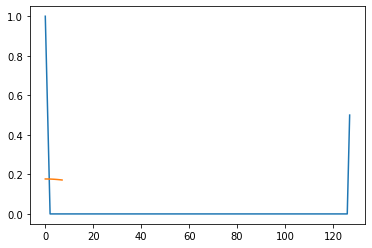

In [29]:
plt.plot(sol)
plt.plot(y.real)

## Uniform Uncertainty Principle (UUP)

$\Phi$ obeys a UUP for sets of size $K$ if

<center>
$$    0.8 \frac{M}{N} ||f||_2^2 \leq || \Phi f||_2^2 \leq 1.2 \frac{M}{N} ||f||_2^2 $$
</center>

Measurements that satisfy this are defined as *incoherent*. Given that $f$ is $K$-sparse and we measure
$y=\Phi f$, then we search for the sparsest vector that explains the $y$ measurements and thus find $f$ as follows:
    
<center>
    $min_f  \# \lbrace t: f(t) \ne 0 \rbrace $ where $\Phi f = y$
</center>    
    Note that the hash mark is the size (i.e. cardinality) of the set. This means that we are looking for the fewest individual points for $f$ that satisfy the constraints.    Unfortunately, this is not practically possible, so we must use the $\mathbb{L}_1$ norm as a proxy for sparsity.
    
Suppose $f$ is $K$-sparse and that $\Phi$ obeys UUP for sets of size $4K$. Then we measure $y=\Phi f$ and then solve
    
<center>
    $min_f ||f||_1 $ where $\Phi f = y$
</center>    
to recover $f$ exactly and we can use $M > K \log N$ measurements, where the number of measurements is approximately equal to the number of active components.    Let's consider a concrete example of how this works.

### Example: Sampling Sinusoids

Here, we sample in the time-domain, given that we know the signal is sparse in the frequency domain. 

<center>
$$ \hat{f}(\omega) = \sum_{i=1}^K \alpha_i \delta(\omega_i-\omega) $$
</center>

which means that it consists of $K$-sparse nonzero elements. Therefore, the time domain signal is

<center>
$$ f(t) =  \sum_{i=1}^K \alpha_i e^{i \omega_i t} $$
</center>

where the $\alpha_i$ and $\omega_i$ are unknown. We want solve for these unknowns by taking $M \gt K \log N$ samples of $f$.

The problem we want to solve is 

$ min_g || \hat{g} ||_{L_1}$

subject to

$ g(t_m)=f(t_m) $

The trick here is that are minimizing in the frequency-domain while the constraints are in the time-domain. To make things easier, we will restrict our attention to real time-domain signals $f$ and we will only reconstruct the even-indexed time-samples from the signal. This means we need a way of  expressing the inverse Fourier Transform as a matrix of equality constraints. The assumption of real-valued time-domain signals implies the following symmetry in the frequency-domain:

$ F(k) = F(N-k)^* $

where $F$ is the Fourier transform of $f$ and the asterisk denotes complex conjugation and $k\in \lbrace 0,1,..N-1\rbrace$ and $N$ is the Fourier Transform length. To make things even more tractable we will assume the time-domain signal is even, which means real-valued Fourier transform values.

Suppose that $\mathbf{U}_N$ is the $N$-point DFT-matrix. Note that we always assume $N$ is even. Since we are dealing with only real-valued signals, the transform is symmetric, so we only need half of the spectrum computed. It turns out that the even-indexed time-domain samples can be constructed as follows:

$ \mathbf{f_{even}} = \mathbf{U}_{N/2} \begin{bmatrix}\\\\
F(0)+F(N/2)^* \\\\
F(1)+F(N/2-1)^* \\\\
F(2)+F(N/2-2)^* \\\\
\dots \\\\
F(N/2-1)+F(1)^* 
\end{bmatrix}$

We can further simplify this by breaking this into real (superscript $R$)  and imaginary (superscript $I$) parts and keeping only the real part

$$\mathbf{f_{even}} = \mathbf{U}_{N/2}^R
\begin{bmatrix}\\\\
F(0)^R+F(N/2)^R \\\\
F(1)^R+F(N/2-1)^R \\\\
F(2)^R+F(N/2-2)^R \\\\
\dots \\\\
F(N/2-1)^R+F(1)^R 
\end{bmatrix}
+
\mathbf{U}^I_N
\begin{bmatrix} \\\\
-F(0)^I+F(N/2)^I  \\\\
-F(1)^I+F(N/2-1)^I  \\\\
-F(2)^I+F(N/2-2)^I  \\\\
\dots \\\\
-F(N/2-1)^I+F(1)^I 
\end{bmatrix}$$

But we are going to force all the $F(k)^I$ to be zero in our example. Note that the second term should have a $\mathbf{U}_{N/2}$ in it instead $\mathbf{U}_N$ but there is something wrong with the javascript parser for that bit of TeX.

Now, let's see if we can walk through to step-by-step to make sure our optimization can actually work. Note that we don't need the second term on the right with the $F^I$ terms because by our construction, $F$ is real.

In [35]:
def dftmatrix(N=8): 
    'compute inverse DFT matrices'
    n = np.arange(N)
    U = np.matrix(np.exp(1j*2*np.pi/N*n*n[:,None] ))/np.sqrt(N)
    return np.matrix(U)

def Q_rmatrix(Nf=8):
    'implements the reordering, adding, and stacking of the matrices above'
    Q_r = np.matrix(np.hstack([np.eye(Nf//2),np.eye(Nf//2)*0])
               + np.hstack([np.zeros((Nf//2,1)),np.fliplr(np.eye(Nf//2)),np.zeros((Nf//2,Nf//2-1))]))
    return Q_r

Nf = 8
F = np.zeros((Nf,1)) # 8-point DFT
F[0] = 1 # DC-term, constant signal
n = np.arange(Nf/2)

ft = dftmatrix(Nf).H*F # this gives the constant signal

Q_r = Q_rmatrix(Nf)
U = dftmatrix(Nf/2) #half inverse DFT matrix
feven = U.real*Q_r*F # half the size
print(np.allclose(feven,ft[::2])) # retrieved even-numbered samples



False


False


Text(0.5, 1.0, 'even-numbered samples')

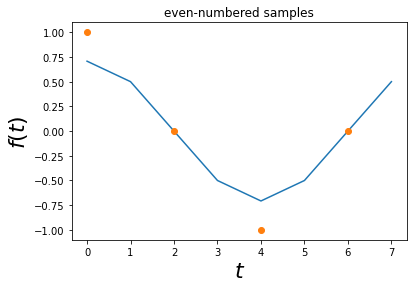

In [40]:
# let's try this with another sparse frequency-domain signal
F = np.zeros((Nf,1))  
F[1] = 1
F[Nf-1] = 1 # symmetric part
ft = dftmatrix(Nf).H*F # this gives the constant signal
feven = U.real*Q_r*F  # half the size
print(np.allclose(feven,ft[::2])) # retrieved even-numbered samples

plt.plot(np.arange(Nf),ft.real, np.arange(Nf)[::2],feven,'o')
plt.xlabel('$t$',fontsize = 22)
plt.ylabel('$f(t)$',fontsize = 22)
plt.title('even-numbered samples')

We can use the above cell to create more complicated real signals. You can experiment with the cell below. Just remember to impose the symmetry condition!

False


Text(0.5, 1.0, 'even-numbered samples')

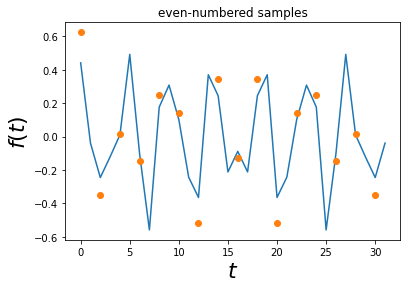

In [43]:
Nf = 32 # must be even
F = np.zeros((Nf,1))  

# set values and corresponding symmetry conditions

F[7] = 1 
F[12] = 0.5
F[9] = -0.25
F[Nf-9] = -0.25
F[Nf-12] = 0.5
F[Nf-7] = 1 # symmetric part

Q_r=Q_rmatrix(Nf)
U=dftmatrix(Nf/2) #half inverse DFT matrix
ft = dftmatrix(Nf).H*F # this gives the constant signal
feven= U.real*Q_r*F  # half the size
print(np.allclose(feven,ft[::2])) # retrieved even-numbered samples

plt.plot(np.arange(Nf),ft.real, np.arange(Nf)[::2],feven,'o')
plt.xlabel('$t$',fontsize=22)
plt.ylabel('$f(t)$',fontsize=22)
plt.title('even-numbered samples')

Now that we have gone through all that trouble to create the even-samples matrix, we can finally put it into the framework of the $L_1$ minimization problem:

$ min_F || \mathbf{F} ||_{L_1}$

subject to

$ \mathbf{U}_{N/2}^R \mathbf{Q}_r  \mathbf{F}= \mathbf{f} $

In [44]:
def rearrange_G( x ): 
    'setup to put inequalities matrix with first 1/2 of elements as main variables'
    n = x.shape[0]
    return np.hstack([x[:, np.arange(0,n,2)+1], x[:,np.arange(0,n,2)]])

K = 2 # components
Nf = 128 # number of samples
M = 18 # > K log(N); num of measurements

# setup signal DFT as F
F = np.zeros((Nf,1))  
F[1] = 1
F[2] = 0.5
F[Nf-1] = 1 # symmetric parts
F[Nf-2] = 0.5
ftime = dftmatrix(Nf).H*F # this gives the time-domain signal
ftime = ftime.real # it's real anyway
time_samples = [0, 2, 4, 12, 14, 16, 18, 24, 34, 36, 38, 40, 44, 46, 52, 56, 54,62]
half_indexed_time_samples = (np.array(time_samples)/2).astype(int)
Phi = dftmatrix(Nf/2).real*Q_rmatrix(Nf)
Phi_i = Phi[half_indexed_time_samples,:]

# inequalities matrix with 
G = matrx(rearrange_G(scipy.linalg.block_diag(*[np.matrix([[-1,-1],[1,-1.0]]),]*Nf) ))
# objective function row-matrix
c = matrx(np.hstack([np.zeros(Nf),np.ones(Nf)]))
# RHS for inequalities
h = matrx([0.0,]*(Nf*2),(Nf*2,1),'d') 
# equality constraint matrix
A = matrx(np.hstack([Phi_i,Phi_i*0]))
# RHS for equality constraints 
b = matrx(ftime[time_samples])

sol = solvers.lp(c, G, h,A,b)


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  4e+02  2e+01  3e+00  1e+00
 1: -1.5648e+01 -1.2218e+01  2e+03  2e+01  3e+00  4e+00
 2: -2.3184e+03 -1.7022e+03  1e+06  8e+01  1e+01  6e+02
 3: -2.2814e+05 -1.6566e+05  1e+08  8e+01  1e+01  6e+04
 4: -2.2818e+07 -1.6568e+07  1e+10  8e+01  1e+01  6e+06
 5: -2.2818e+09 -1.6568e+09  1e+12  8e+01  1e+01  6e+08
Certificate of dual infeasibility found.


In [48]:
import itertools as it

def dftmatrix(N=8): 
    'compute inverse DFT matrices'
    n = np.arange(N)
    U = np.matrix(np. exp(1j*2*np.pi/N*n*n[:,None] ))/np.sqrt(N)
    return np.matrix(U)

M = 3

np.random.seed(5489) # set random seed for reproducibility
Psi = dftmatrix(128)
Phi = np.random.randn(M,128)
s = np.zeros((128,1))
s[0] = 1
s[10] = 1

Theta = Phi*Psi
y = Theta*s

for i in it.combinations(range(128),2):
   sstar = np.zeros((128,1))
   sstar[np.array(i)]=1
   if np.allclose(Theta*sstar,y):
      break
else:
   print('no solution')


In [49]:
%qtconsole